# Solution of lab exam

## Load dataset

In [16]:
import pandas as pd
import networkx as nx
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

In [17]:
file_path = "/content/cora.content"
cora = pd.read_csv(file_path, sep='\t', header=None, low_memory=False, encoding='unicode_escape')
cora

,0,1,2,3,4,5,6,7,8,9,...,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434
0,31336,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1,1061127,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning
2,1106406,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
3,13195,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
4,37879,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,1128975,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2704,1128977,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2705,1128978,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2706,117328,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Case_Based


1434
Neural_Networks           818
Probabilistic_Methods     426
Genetic_Algorithms        418
Theory                    351
Case_Based                298
Reinforcement_Learning    217
Rule_Learning             180
Name: count, dtype: int64


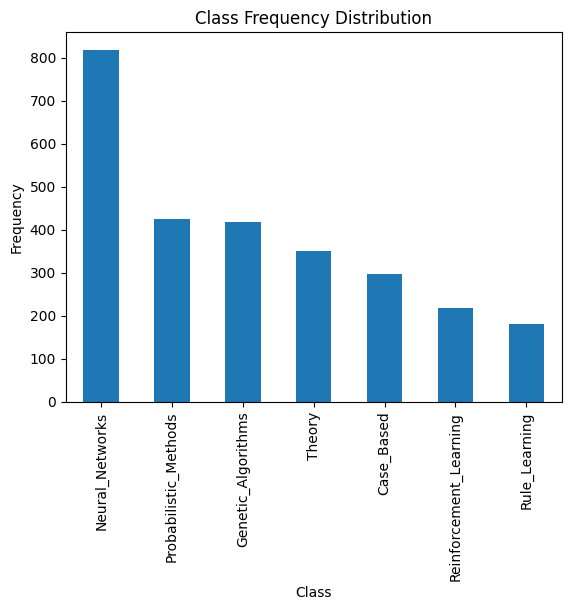

In [18]:
# class distribution
class_freq = pd.value_counts(cora.iloc[:,-1])
print(class_freq)
class_freq.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Frequency Distribution')
plt.show()

In [19]:
nodeIDs=cora.iloc[:,0]
print(nodeIDs[:5])
graph = nx.DiGraph()
for node in nodeIDs:
    graph.add_node(str(node).strip())
X = cora.iloc[:, 1:-1]
Y = cora.iloc[:, -1]
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)
print(X.shape, Y.shape)

0      31336
1    1061127
2    1106406
3      13195
4      37879
Name: 0, dtype: int64
(2708, 1433) (2708,)


In [20]:
edge_file_path = "/content/cora.cites"
with open(edge_file_path,'r')as file:
  for idx, line in enumerate(file):
    nodes = line.strip().split()
    node1=str(nodes[0])
    node2=str(nodes[1])
    graph.add_edge(node1, node2)
adjacency_matrix = nx.adjacency_matrix(graph)
A_dense = np.array(adjacency_matrix.todense())
A_dense

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## PageRank

In [21]:
n = len(A_dense)
L = np.zeros_like(A_dense, dtype=float)
alpha = 0.85
for i in range(n):
    out_links = np.sum(A_dense[i], axis=0)
    # print(out_links)
    if out_links == 0:
        L[i] = 1 / n
    else:
        L[i] = A_dense[i] / out_links

M = alpha * L + ((1 - alpha) / n) * np.ones((n, n))
pagerank = np.ones(n) / n       # Initialize the PageRank vector

for i in range(100):
    new_pagerank = np.dot(M.T, pagerank)
    if np.linalg.norm(new_pagerank - pagerank, ord=1) < 1e-8:
        # print(i)
        break
    pagerank = new_pagerank

print(pagerank[:10])
sorted_indices = np.argsort(-pagerank.flatten())
sorted_vector = pagerank[sorted_indices]

[0.00021676 0.00019856 0.00030474 0.00019193 0.00019193 0.00024786
 0.00025147 0.00020748 0.00033959 0.00055442]


In [22]:
top_k_indices = np.argsort(-pagerank)[:5]  # Get indices of top 5 pagerank values
top_k_values = pagerank[top_k_indices]     # Get top 3 pagerank values

# Get node IDs and their corresponding pagerank values
top_k_nodes = [(index, value) for index, value in zip(top_k_indices, top_k_values)]

print("Top 5 nodes with highest pagerank:")
for node, pagerank_value in top_k_nodes:
    print(f"Paper with nodeID {node}: Pagerank = {pagerank_value}")

Top 5 nodes with highest pagerank:
Paper with nodeID 1937: Pagerank = 0.004771087027485981
Paper with nodeID 1064: Pagerank = 0.004582901370876762
Paper with nodeID 1701: Pagerank = 0.0034907399549798414
Paper with nodeID 1814: Pagerank = 0.003442286590018181
Paper with nodeID 834: Pagerank = 0.003310903229245167


In [23]:
# def compute_pagerank(adjacency_matrix, damping_factor, num_iterations=200, epsilon=1e-8):
#     n = len(adjacency_matrix)
#     M = np.zeros_like(adjacency_matrix, dtype=float)  #compute transition matrix
#     for i in range(n):
#         outgoing_links = np.sum(adjacency_matrix[i])
#         if outgoing_links == 0:
#             M[i] = 1 / n
#         else:
#             M[i] = adjacency_matrix[i] / outgoing_links

#     pagerank = np.ones(n) / n
#     for iter in range(num_iterations):
#         new_pagerank = (1 - damping_factor) / n + damping_factor * np.dot(M.T, pagerank)    # Pagerank power method with damping factor
#         if np.linalg.norm(new_pagerank - pagerank, ord=1) < epsilon:
#             break
#         pagerank = new_pagerank
#     return pagerank, iter+1

# def display_pagerank(pagerank, damping_factor):
#     print("PageRank scores with damping:", damping_factor)
#     for i, score in enumerate(pagerank):
#         print(f"Page {i+1}: {score}")

# def main():
#     damping_factor = 0.85

#     adjacency_matrix = A_dense  # get adjacency matrix of cora
#     pagerank, iter = compute_pagerank(adjacency_matrix, damping_factor=damping_factor)

#     top_k_indices = np.argsort(-pagerank)[:5]  # Get indices of top 5 pagerank values
#     top_k_values = pagerank[top_k_indices]     # Get top 3 pagerank values

#     # Get node IDs and their corresponding pagerank values
#     top_k_nodes = [(index, value) for index, value in zip(top_k_indices, top_k_values)]

#     print("Top 5 nodes with highest pagerank:")
#     for node, pagerank_value in top_k_nodes:
#         print(f"Paper with nodeID {node}: Pagerank = {pagerank_value}")

# if __name__ == "__main__":
#     main()


## Classification using KNN

In [24]:
def knn_predict(X_train, y_train, X_test, k):
    predictions = []
    for x in X_test:
        distances = np.linalg.norm(X_train - x, axis=1)
        nearest_indices = np.argsort(distances)[:k]
        nearest_labels = y_train[nearest_indices]
        counts = np.bincount(nearest_labels)

        prediction = np.argmax(counts)
        predictions.append(prediction)
    return np.array(predictions)


### Random Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42, stratify=Y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2166, 1433), (2166,), (542, 1433), (542,))

In [26]:
# Use the KNN classifier to make predictions
accuracy_arr = []
k_values = np.arange(1,6)
# print(k_values)
for k in k_values:
  predictions_knn = knn_predict(np.array(X_train), np.array(y_train), np.array(X_test),k)
  accuracy_knn = accuracy_score(y_test, predictions_knn)
  print(f"KNN Accuracy with {k} neighbours:", accuracy_knn)
  accuracy_arr.append(accuracy_knn)

KNN Accuracy with 1 neighbours: 0.4483394833948339
KNN Accuracy with 2 neighbours: 0.43911439114391143
KNN Accuracy with 3 neighbours: 0.45387453874538747
KNN Accuracy with 4 neighbours: 0.4612546125461255
KNN Accuracy with 5 neighbours: 0.45571955719557194


In [27]:
# classwise Precision, Recall
precision = precision_score(y_test, predictions_knn, average=None)
recall = recall_score(y_test, predictions_knn, average=None)

for class_label, prec, rec in zip(range(len(precision)), precision, recall):
    print(f"Class {class_label}: Precision = {prec}, Recall = {rec}")


Class 0: Precision = 0.4426229508196721, Recall = 0.45
Class 1: Precision = 0.38011695906432746, Recall = 0.7738095238095238
Class 2: Precision = 0.480225988700565, Recall = 0.5182926829268293
Class 3: Precision = 0.5617977528089888, Recall = 0.5882352941176471
Class 4: Precision = 0.75, Recall = 0.13953488372093023
Class 5: Precision = 0.16666666666666666, Recall = 0.08333333333333333
Class 6: Precision = 0.6111111111111112, Recall = 0.15714285714285714


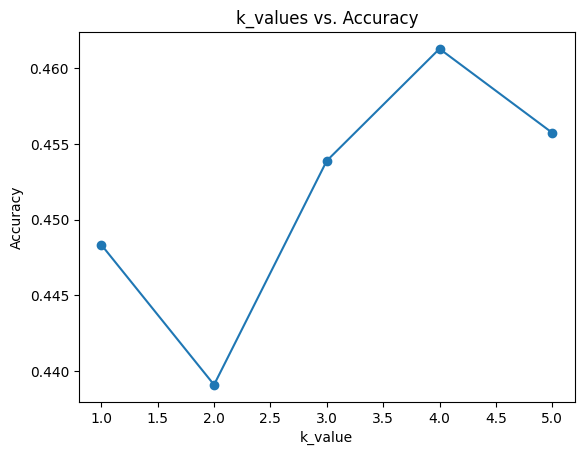

In [28]:
# Plot k-values vs accuracy
plt.plot(k_values, accuracy_arr, marker='o')
plt.title('k_values vs. Accuracy')
plt.xlabel('k_value')
plt.ylabel('Accuracy')
plt.show()

### PageRank based split

In [29]:
split_index = int(len(sorted_vector) * 0.8)
sorted_cora = cora.iloc[sorted_indices.flatten()]
sortedX = cora.iloc[:, 1:-1]
sortedY = cora.iloc[:, -1]
sortedY = label_encoder.fit_transform(sortedY)

X_train_sorted = sortedX[:split_index]
X_test_sorted = sortedX[split_index:]
y_train_sorted = sortedY[:split_index]
y_test_sorted = sortedY[split_index:]
# X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

In [30]:
accuracy_arr_sorted = []
for k in k_values:
  predictions_knn_sorted = knn_predict(np.array(X_train_sorted), np.array(y_train_sorted), np.array(X_test_sorted), k)
  accuracy_knn_sorted = accuracy_score(y_test_sorted, predictions_knn_sorted)
  print("KNN Accuracy:", accuracy_knn_sorted)
  accuracy_arr_sorted.append(accuracy_knn_sorted)

KNN Accuracy: 0.4114391143911439
KNN Accuracy: 0.43911439114391143
KNN Accuracy: 0.42435424354243545
KNN Accuracy: 0.44095940959409596
KNN Accuracy: 0.45202952029520294


In [31]:
# classwise Precision, Recall
precision = precision_score(y_test, predictions_knn_sorted, average=None)
recall = recall_score(y_test, predictions_knn, average=None)

for class_label, prec, rec in zip(range(len(precision)), precision, recall):
    print(f"Class {class_label}: Precision = {prec}, Recall = {rec}")


Class 0: Precision = 0.14285714285714285, Recall = 0.45
Class 1: Precision = 0.1079136690647482, Recall = 0.7738095238095238
Class 2: Precision = 0.3070539419087137, Recall = 0.5182926829268293
Class 3: Precision = 0.22388059701492538, Recall = 0.5882352941176471
Class 4: Precision = 0.25, Recall = 0.13953488372093023
Class 5: Precision = 0.0, Recall = 0.08333333333333333
Class 6: Precision = 0.08108108108108109, Recall = 0.15714285714285714


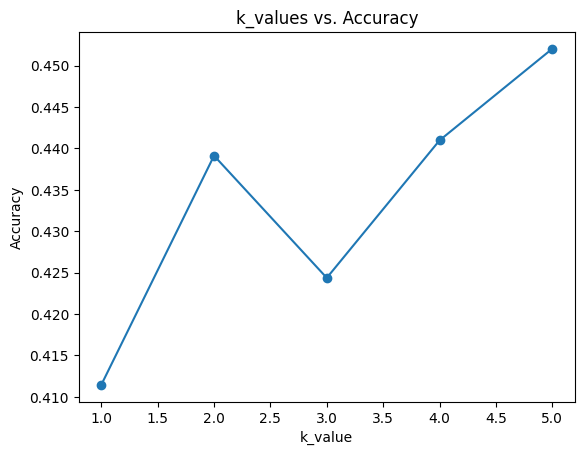

In [32]:
# Plot k-values vs accuracy
import matplotlib.pyplot as plt
plt.plot(k_values, accuracy_arr_sorted, marker='o')
plt.title('k_values vs. Accuracy')
plt.xlabel('k_value')
plt.ylabel('Accuracy')
plt.show()

## Top-5 cited papers in entire graph


In [33]:
def hits(adj, num_iterations=100, epsilon=1e-8):
        num_nodes = adjacency_matrix.shape[0]
        hub = np.ones((num_nodes,1))/n
        auth = np.ones(num_nodes)/n

        for i in range(num_iterations):
            new_auth = np.dot(adj.T, hub)
            new_auth /= np.linalg.norm(new_auth, ord=2)

            # Update hub scores
            new_hub = np.dot(adj, new_auth)
            new_hub /= np.linalg.norm(new_hub, ord=2)

            if np.linalg.norm(new_auth - auth, ord=1) < epsilon and \
               np.linalg.norm(new_hub - hub, ord=1) < epsilon:
                break

            auth = new_auth
            hub = new_hub
        return hub, auth

In [34]:
hub_score , authority_score = hits(A_dense)
authority_score

array([[1.37328584e-06],
       [3.68886649e-05],
       [1.82017282e-03],
       ...,
       [9.41361249e-04],
       [0.00000000e+00],
       [0.00000000e+00]])

In [36]:
sorted_indices = np.argsort(authority_score.flatten())[::-1]

for i in range(5):
    # print(f"PaperID: {top_5_indices[i]}, Score: {top_5_values[i]}")
    print(f"PaperID: {cora.iloc[sorted_indices[i],0]}, Score: {authority_score[sorted_indices[i]]}")

PaperID: 1152421, Score: [0.09125832]
PaperID: 1154459, Score: [0.09125832]
PaperID: 1153280, Score: [0.09125832]
PaperID: 1153943, Score: [0.0896941]
PaperID: 1119708, Score: [0.08763587]


## Top-5 cited papers in class "Neural-networks" and "Genetic-Algorithms" respectively

In [39]:
classes_vector = cora.iloc[:, -1]
original_indices = cora.iloc[:,0]

# Combine the two vectors and original indices into a list of tuples
combined = list(zip(classes_vector, authority_score, original_indices))

# Group the combined list by class
grouped = {}
for cls, value, index in combined:
    if cls not in grouped:
        grouped[cls] = []
    grouped[cls].append((value.item(), index))  # Convert NumPy arrays to plain numbers and store the original index

# Sort each group by page rank in descending order
for cls in sorted(grouped.keys(), reverse=True):
    sorted_values = sorted(grouped[cls], key=lambda x: x[0], reverse=True)
    if cls in ["Genetic_Algorithms", "Neural_Networks"]:
      print(f"Class {cls}: {sorted_values[:5]}")

Class Neural_Networks: [(0.0763734526849461, 46431), (0.07555836102859552, 175291), (0.07554833103904526, 1120431), (0.07460488392933157, 249421), (0.07374095670192403, 103482)]
Class Genetic_Algorithms: [(0.09125832035532093, 1154459), (0.09125832035532093, 1152421), (0.09125832035532093, 1153280), (0.08969409886802923, 1153943), (0.08763587006973016, 1119708)]
